# 导入模块

In [2]:
import sys

sys.executable

'/root/jupyter env/bin/python'

In [4]:
import os

In [15]:
# os.listdir('../Data')
os.chdir('../Data/')

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import gc
import warnings

In [14]:
warnings.filterwarnings('ignore')

In [16]:
os.listdir()

['test.csv', 'train.csv', 'data_description.txt', 'sample_submission.csv']

# 数据探索

In [17]:
train = pd.read_csv('train.csv')

In [18]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
train.shape

(1460, 81)

In [24]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [36]:
train_col = train.isnull().sum() > 200
trian_col

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [39]:
# 现在我要挑选出缺失值小于两百的列出来，使用布尔运算比较方便
# trian1,是丢弃列缺失值比较多的列
train1 = train.loc[:, train.isnull().sum()<200]

In [41]:
train1.shape[1]

75

In [47]:
# 现在问题来了，特征那么多，应该怎么利用这些缺失值呢
nan_list = train1.loc[:,train1.isnull().sum() != 0].columns.to_list()

In [48]:
nan_list

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [49]:
train1[nan_list].isnull().sum()

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [50]:
train1[nan_list].dtypes

MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

In [60]:
train1['MasVnrArea'].dtype == object

False

In [87]:
# 计算哪些类型为object的数据的种类
# for each in nan_list:
#     if train1[each].dtype == object:
#         print(each)
#         print(f'{train1[each].value_counts()}')
#         print('-'*20)

In [68]:
# 填充缺失值

for each in nan_list:
    if train1[each].dtype == object:
        train1[each].fillna(train1[each].mode()[0], inplace=True)
    else:
        # 疑问，用中位数填充还是平均数填充？
        train1[each].fillna(train1[each].median(), inplace=True)

In [70]:
# 填充完毕
# train1[nan_list].isnull().sum()

(array([1.085e+03, 2.190e+02, 9.400e+01, 2.900e+01, 1.900e+01, 6.000e+00,
        4.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([   0.,  160.,  320.,  480.,  640.,  800.,  960., 1120., 1280.,
        1440., 1600.]),
 <BarContainer object of 10 artists>)

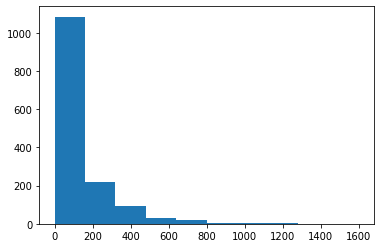

In [82]:
temp = ['MasVnrArea', 'GarageYrBlt']
plt.hist(train1[temp[0]])

(array([  6.,  28.,  49.,  52.,  93., 195., 194., 221., 190., 432.]),
 array([1900., 1911., 1922., 1933., 1944., 1955., 1966., 1977., 1988.,
        1999., 2010.]),
 <BarContainer object of 10 artists>)

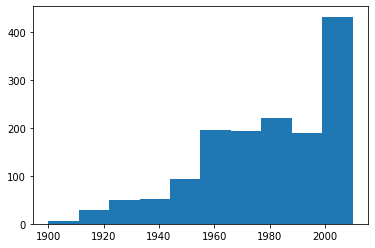

In [81]:
plt.hist(train1[temp[1]])

In [88]:
col = train1.columns.to_list()

In [90]:
categories_col = []
float_col = []
for each in col:
    if train1[each].dtype == object:
        categories_col.append(each)
    else:
        float_col.append(each)

In [93]:
print(len(categories_col))
print(len(float_col))

38
37


# 参考资料

[参考资料1](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)

[参考资料2](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)

# TODO

1. 数据特征这么多怎么办？
2. 参考教程1
3. 准备开始特征工程